# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings
import warnings


In [ ]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

df = pd.read_parquet('/content/drive/MyDrive/EDA-Assignment/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
import os
import pandas as pd

#file path
folder_path = "/content/drive/MyDrive/EDA-Assignment/Datasets and Dictionary/trip_records"
file_list = sorted([f for f in os.listdir(folder_path) if f.endswith(".parquet")])

# initialise an empty dataframe
final_sampled_df = pd.DataFrame()

sample_fraction = 0.05
target_rows = 300_000

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_parquet(file_path)

        # Detect datetime column
        datetime_col = next((col for col in ["pickup_datetime", "tpep_pickup_datetime", "lpep_pickup_datetime"] if col in df.columns), None)
        if datetime_col is None:
            print(f"Skipping {file_name} - No datetime column found")
            continue

        df[datetime_col] = pd.to_datetime(df[datetime_col])
        df["date"] = df[datetime_col].dt.date
        df["hour"] = df[datetime_col].dt.hour

        monthly_sampled_df = pd.DataFrame()

        for date in df["date"].unique():
            daily_data = df[df["date"] == date]
            daily_sampled_df = pd.DataFrame()

            for hour in range(24):
                hourly_data = daily_data[daily_data["hour"] == hour]

                if not hourly_data.empty:
                    hourly_sampled = hourly_data.sample(frac=sample_fraction, random_state=42)
                    daily_sampled_df = pd.concat([daily_sampled_df, hourly_sampled], ignore_index=True)

            monthly_sampled_df = pd.concat([monthly_sampled_df, daily_sampled_df], ignore_index=True)

        final_sampled_df = pd.concat([final_sampled_df, monthly_sampled_df], ignore_index=True)

    except Exception as e:
        print(f"Error processing {file_name}: {e}")

# sample it down
if len(final_sampled_df) > target_rows:
    final_sampled_df = final_sampled_df.sample(n=target_rows, random_state=42)

# output paths
csv_output_path = os.path.join(folder_path, "sampled_trip_records.csv")
parquet_output_path = os.path.join(folder_path, "sampled_trip_records.parquet")

# final dataset
final_sampled_df.to_csv(csv_output_path, index=False)
final_sampled_df.to_parquet(parquet_output_path, index=False)


print(f"Final dataset saved:\nParquet -> {parquet_output_path}")
print(f"Total rows in final dataset: {len(final_sampled_df)}")

Final dataset saved:
Parquet -> /content/drive/MyDrive/EDA-Assignment/Datasets and Dictionary/trip_records/sampled_trip_records.parquet
Total rows in final dataset: 300000


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

df.to_parquet('/content/drive/MyDrive/EDA-Assignment/Datasets and Dictionary/trip_records/sampled_trip_records.parquet')

In [ ]:
num_rows = len(df)
print(f"Total rows: {num_rows}")

Total rows: 300000


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file

df = pd.read_parquet('/content/drive/MyDrive/EDA-Assignment/Datasets and Dictionary/trip_records/sampled_trip_records.parquet')


In [ ]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-24 22:59:46   2023-12-24 23:10:10              1.0   
1         2  2023-05-13 21:12:39   2023-05-13 21:21:45              1.0   
2         2  2023-04-10 23:44:41   2023-04-11 00:05:00              1.0   
3         2  2023-05-13 15:52:16   2023-05-13 16:24:55              1.0   
4         2  2023-02-17 15:39:58   2023-02-17 15:49:57              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.18         1.0                  N           161           141   
1           1.78         1.0                  N           163           170   
2           2.84         1.0                  N           161           161   
3           3.70         1.0                  N           142           239   
4           1.75         1.0                  N           151           142   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        4.45           0.0   
1             2  ...      0.5        0.00           0.0   
2             4  ...      0.5        0.00           0.0   
3             1  ...      0.5        8.40           0.0   
4             1  ...      0.5        3.85           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         22.25                   2.5          NaN   
1                    1.0         16.40                   2.5          NaN   
2                    1.0         25.50                   2.5          NaN   
3                    1.0         42.00                   2.5          NaN   
4                    1.0         19.25                   2.5          NaN   

         date  hour Airport_fee  
0  2023-12-24    22         0.0  
1  2023-05-13    21         0.0  
2  2023-04-10    23         0.0  
3  2023-05-13    15         0.0  
4  2023-02-17    15         0.0  

[5 rows x 22 columns]

In [ ]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289863 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289827 non-null  float64       
 6   store_and_fwd_flag     287584 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed

# Reset the index
df.reset_index(drop=True, inplace=True)

# Drop store_and_fwd_flag due to Low Variability, Not Required for Geospatial or Temporal Analysis
columns_to_drop = ["store_and_fwd_flag"]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

print(df.info())

# Save cleaned dataset
cleaned_parquet_path = "/content/drive/MyDrive/EDA-Assignment/Datasets and Dictionary/trip_records/cleaned_trip_records.parquet"
cleaned_csv_path = "/content/drive/MyDrive/EDA-Assignment/Datasets and Dictionary/trip_records/cleaned_trip_records.csv"

df.to_parquet(cleaned_parquet_path, index=False)
df.to_csv(cleaned_csv_path, index=False)

print(f"Cleaned dataset saved at:\n- {cleaned_parquet_path}\n- {cleaned_csv_path}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289863 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289827 non-null  float64       
 6   PULocationID           300000 non-null  int64         
 7   DOLocationID           300000 non-null  int64         
 8   payment_type           300000 non-null  int64         
 9   fare_amount            300000 non-null  float64       
 10  extra                  300000 non-null  float64       
 11  mta_tax                300000 non-null  float64       
 12  tip_amount             300000 non-null  floa

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns
if "airport_fee" in df.columns and "Airport_fee" in df.columns:
    df["airport_fee"] = df["airport_fee"].fillna(df["Airport_fee"])
    df.drop(columns=["Airport_fee"], inplace=True)


In [ ]:
print(df["airport_fee"].isnull().sum())

10137


In [ ]:
df.to_parquet("/content/drive/MyDrive/EDA-Assignment/Datasets and Dictionary/trip_records/cleaned_trip_records.parquet", index=False)
df.to_csv("/content/drive/MyDrive/EDA-Assignment/Datasets and Dictionary/trip_records/cleaned_trip_records.csv", index=False)

In [ ]:
df.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-24 22:59:46   2023-12-24 23:10:10              1.0   
1         2  2023-05-13 21:12:39   2023-05-13 21:21:45              1.0   
2         2  2023-04-10 23:44:41   2023-04-11 00:05:00              1.0   
3         2  2023-05-13 15:52:16   2023-05-13 16:24:55              1.0   
4         2  2023-02-17 15:39:58   2023-02-17 15:49:57              1.0   
5         2  2023-03-29 11:36:58   2023-03-29 11:57:48              1.0   
6         2  2023-10-02 10:38:46   2023-10-02 10:44:48              1.0   
7         2  2023-10-04 14:59:37   2023-10-04 15:11:49              1.0   
8         2  2023-02-09 15:47:27   2023-02-09 16:01:00              1.0   
9         2  2023-07-10 12:45:03   2023-07-10 12:50:17              6.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           2.18         1.0           161           141             1   
1           1.78         1.0           163           170             2   
2           2.84         1.0           161           161             4   
3           3.70         1.0           142           239             1   
4           1.75         1.0           151           142             1   
5           2.29         1.0           161            79             2   
6           0.82         1.0           262           236             1   
7           1.21         1.0           107           233             1   
8           1.24         1.0           230            90             2   
9           0.92         1.0           116           116             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         12.8    1.0      0.5        4.45           0.0   
1         11.4    1.0      0.5        0.00           0.0   
2         20.5    1.0      0.5        0.00           0.0   
3         29.6    0.0      0.5        8.40           0.0   
4         11.4    0.0      0.5        3.85           0.0   
5         18.4    0.0      0.5        0.00           0.0   
6          7.9    0.0      0.5        2.38           0.0   
7         12.1    0.0      0.5        3.22           0.0   
8         12.8    0.0      0.5        0.00           0.0   
9          7.2    0.0      0.5        2.50           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         22.25                   2.5          0.0   
1                    1.0         16.40                   2.5          0.0   
2                    1.0         25.50                   2.5          0.0   
3                    1.0         42.00                   2.5          0.0   
4                    1.0         19.25                   2.5          0.0   
5                    1.0         22.40                   2.5          0.0   
6                    1.0         14.28                   2.5          0.0   
7                    1.0         19.32                   2.5          0.0   
8                    1.0         16.80                   2.5          0.0   
9                    1.0         11.20                   0.0          0.0   

         date  hour  
0  2023-12-24    22  
1  2023-05-13    21  
2  2023-04-10    23  
3  2023-05-13    15  
4  2023-02-17    15  
5  2023-03-29    11  
6  2023-10-02    10  
7  2023-10-04    14  
8  2023-02-09    15  
9  2023-07-10    12

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
negative_fares = df[df["fare_amount"] < 0]
print(negative_fares)


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

negative_fares = df[df["fare_amount"] < 0]
ratecode_negative_fares = negative_fares.groupby("RatecodeID")["fare_amount"].count()
print(ratecode_negative_fares)

Series([], Name: fare_amount, dtype: int64)


In [ ]:
# Find which columns have negative values

num_cols = df.select_dtypes(include=["number"])
negative_values = (num_cols < 0).sum()
print(negative_values[negative_values > 0])

Series([], dtype: int64)


In [ ]:
# fix these negative values
columns_to_fix = ["mta_tax", "improvement_surcharge", "total_amount", "congestion_surcharge", "airport_fee"]

for col in columns_to_fix:
    median_value = df[df[col] >= 0][col].median()
    df[col] = df[col].apply(lambda x: median_value if x < 0 else x)


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column

missing_proportion = df.isnull().mean()
print(missing_proportion)

VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          0.03379
trip_distance            0.00000
RatecodeID               0.03391
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     0.03379
airport_fee              0.03379
date                     0.00000
hour                     0.00000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
rows_with_nulls = df[df.isnull().any(axis=1)]
print(rows_with_nulls)

df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].mean())

print(df['passenger_count'].isnull().sum())

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
57             1  2023-07-31 06:02:46   2023-07-31 06:14:59              NaN   
80             2  2023-05-10 02:09:00   2023-05-10 02:15:00              NaN   
102            2  2023-06-16 11:22:28   2023-06-16 11:30:24              NaN   
120            1  2023-03-30 20:44:12   2023-03-30 20:57:20              NaN   
150            2  2023-12-21 09:41:52   2023-12-21 10:02:56              NaN   
...          ...                  ...                   ...              ...   
299924         1  2023-12-21 09:15:23   2023-12-21 09:30:57              NaN   
299950         1  2023-01-11 19:55:11   2023-01-11 20:22:11              NaN   
299968         2  2023-11-07 15:34:22   2023-11-07 15:59:45              NaN   
299973         6  2023-11-28 12:11:32   2023-11-28 12:11:54              NaN   
299996         2  2023-12-10 23:34:07   2023-12-10 23:37:54              NaN   

        trip_distance  RatecodeID  PULo

In [ ]:
zero_passenger_count = df[df['passenger_count'] == 0]
print(zero_passenger_count)

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
39             1  2023-12-15 20:14:55   2023-12-15 20:39:21              0.0   
104            1  2023-11-19 11:39:19   2023-11-19 11:43:59              0.0   
166            1  2023-03-10 20:04:15   2023-03-10 20:11:28              0.0   
231            1  2023-03-13 16:46:16   2023-03-13 17:06:58              0.0   
272            1  2023-12-09 14:11:37   2023-12-09 14:41:08              0.0   
...          ...                  ...                   ...              ...   
299642         1  2023-04-30 13:26:34   2023-04-30 14:32:05              0.0   
299698         1  2023-06-08 18:46:22   2023-06-08 18:52:15              0.0   
299886         1  2023-10-21 06:12:33   2023-10-21 06:22:26              0.0   
299942         1  2023-12-28 22:56:12   2023-12-28 23:47:25              0.0   
299957         1  2023-02-02 07:12:00   2023-02-02 07:33:07              0.0   

        trip_distance  RatecodeID  PULo

Did you find zeroes in passenger_count? Handle these.

**Yes Found Zeroes**

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'

mode_value = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(mode_value)

print(df['RatecodeID'].isnull().sum())

0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge


df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].median())

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_columns = missing_values[missing_values > 0]

# Display the missing columns and their corresponding percentages
print("Columns with missing values:\n", missing_columns)
print("\nPercentage of missing values in each column:\n", missing_percentage)

Columns with missing values:
 Series([], dtype: int64)

Percentage of missing values in each column:
 VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
date                     0.0
hour                     0.0
dtype: float64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values

airport_zones = [132, 138]
df.loc[df['PULocationID'].isin(airport_zones) & df['airport_fee'].isna(), 'airport_fee'] = 1.75
df['airport_fee'] = df['airport_fee'].fillna(0)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
print(df.describe())


            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  300000.000000                      300000                      300000   
mean        1.733200  2023-07-03 03:17:59.493430  2023-07-03 03:35:28.497287   
min         1.000000         2023-01-01 00:04:55         2023-01-01 00:10:20   
25%         1.000000  2023-04-02 19:58:05.500000  2023-04-02 20:15:33.250000   
50%         2.000000  2023-06-27 21:21:09.500000  2023-06-27 21:32:51.500000   
75%         2.000000         2023-10-07 01:30:58  2023-10-07 01:47:21.250000   
max         6.000000         2023-12-31 23:46:13         2024-01-01 00:29:11   
std         0.447979                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    300000.000000  300000.000000  300000.000000  300000.000000   
mean          1.368985       3.984292       1.630170     165.305987   
min           0.000000       0.000000       1.000000       1.00000

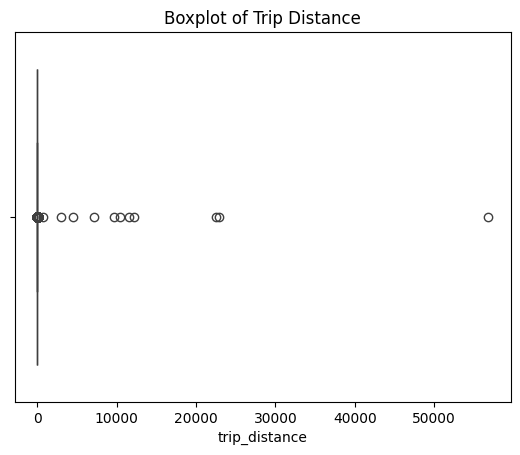

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['trip_distance'])
plt.title("Boxplot of Trip Distance")
plt.show()

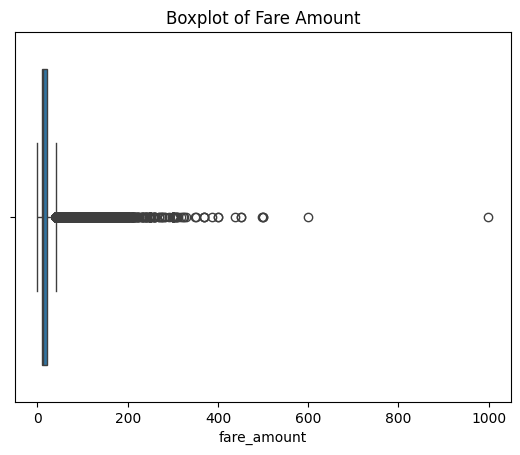

In [ ]:
sns.boxplot(x=df['fare_amount'])
plt.title("Boxplot of Fare Amount")
plt.show()

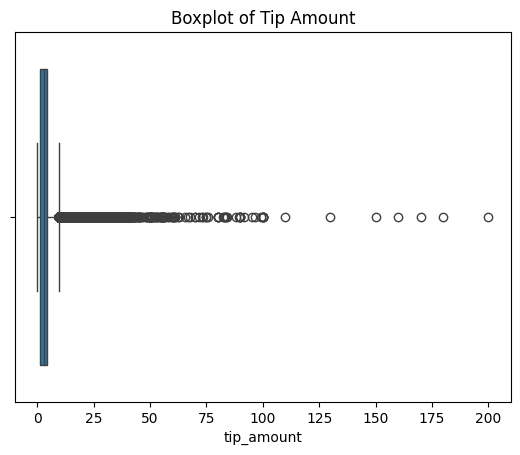

In [ ]:
sns.boxplot(x=df['tip_amount'])
plt.title("Boxplot of Tip Amount")
plt.show()

In [ ]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Detect outliers for trip_distance, fare_amount, and tip_amount
outliers_trip = detect_outliers('trip_distance')
outliers_fare = detect_outliers('fare_amount')
outliers_tip = detect_outliers('tip_amount')

print(f"Outliers in trip_distance: {len(outliers_trip)}")
print(f"Outliers in fare_amount: {len(outliers_fare)}")
print(f"Outliers in tip_amount: {len(outliers_tip)}")

Outliers in trip_distance: 39442
Outliers in fare_amount: 31172
Outliers in tip_amount: 23052


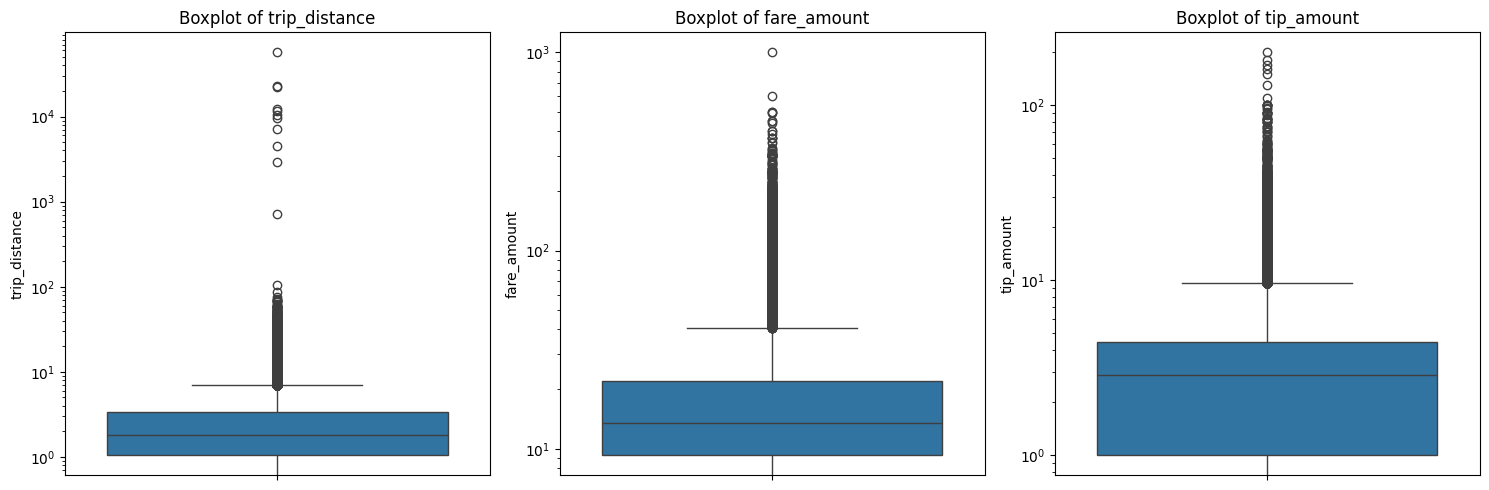

In [ ]:
# Define columns to check
outlier_columns = ["trip_distance", "fare_amount", "tip_amount"]

# Create boxplots for each column
plt.figure(figsize=(15, 5))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.yscale("log")  # Log scale to better visualize extreme values
plt.tight_layout()
plt.show()

In [ ]:
Q1 = df[["trip_distance", "fare_amount", "tip_amount"]].quantile(0.25)
Q3 = df[["trip_distance", "fare_amount", "tip_amount"]].quantile(0.75)
IQR = Q3 - Q1

# Define valid range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ensure proper filtering by using `.loc`
df = df.loc[
    (df["trip_distance"] >= lower_bound["trip_distance"]) & (df["trip_distance"] <= upper_bound["trip_distance"]) &
    (df["fare_amount"] >= lower_bound["fare_amount"]) & (df["fare_amount"] <= upper_bound["fare_amount"]) &
    (df["tip_amount"] >= lower_bound["tip_amount"]) & (df["tip_amount"] <= upper_bound["tip_amount"])
]

print(f"Original dataset: {df.shape[0]} rows")
print(f"Cleaned dataset: {df_cleaned.shape[0]} rows")

Original dataset: 257134 rows
Cleaned dataset: 248580 rows


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6

df = df[df["passenger_count"] <= 6]
print(f"Updated dataset shape: {df.shape}")

Updated dataset shape: (257134, 20)


In [ ]:
# Continue with outlier handling

outliers_fare_high = df[(df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)]
print(outliers_fare_high)


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []


In [ ]:
df = df[~((df["trip_distance"] == 0) &
                          (df["fare_amount"] == 0) &
                          (df["PULocationID"] != df["DOLocationID"]))]

In [ ]:
df = df[df["trip_distance"] <= 250]

In [ ]:
df = df[df["payment_type"] != 0]
print(f"Dataset after fixing outliers: {df.shape[0]} rows")

Dataset after fixing outliers: 248580 rows


In [ ]:
print(df.describe())

            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  248580.000000                      248580                      248580   
mean        1.732436  2023-07-01 22:03:22.505004  2023-07-01 22:17:09.816284   
min         1.000000         2023-01-01 00:04:55         2023-01-01 00:10:20   
25%         1.000000  2023-04-01 01:35:25.750000  2023-04-01 01:47:17.500000   
50%         2.000000         2023-06-25 23:04:27  2023-06-25 23:19:09.500000   
75%         2.000000  2023-10-06 12:29:20.500000         2023-10-06 12:43:47   
max         2.000000         2023-12-31 23:46:13         2024-01-01 00:29:11   
std         0.442690                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    248580.000000  248580.000000  248580.000000  248580.000000   
mean          1.358030       1.919704       1.369060     168.704928   
min           0.000000       0.000000       1.000000       1.00000

In [ ]:
# Do any columns need standardising?
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["trip_distance", "fare_amount", "total_amount", "tip_amount", "tolls_amount"]] = scaler.fit_transform(
    df[["trip_distance", "fare_amount", "total_amount", "tip_amount", "tolls_amount"]]
)


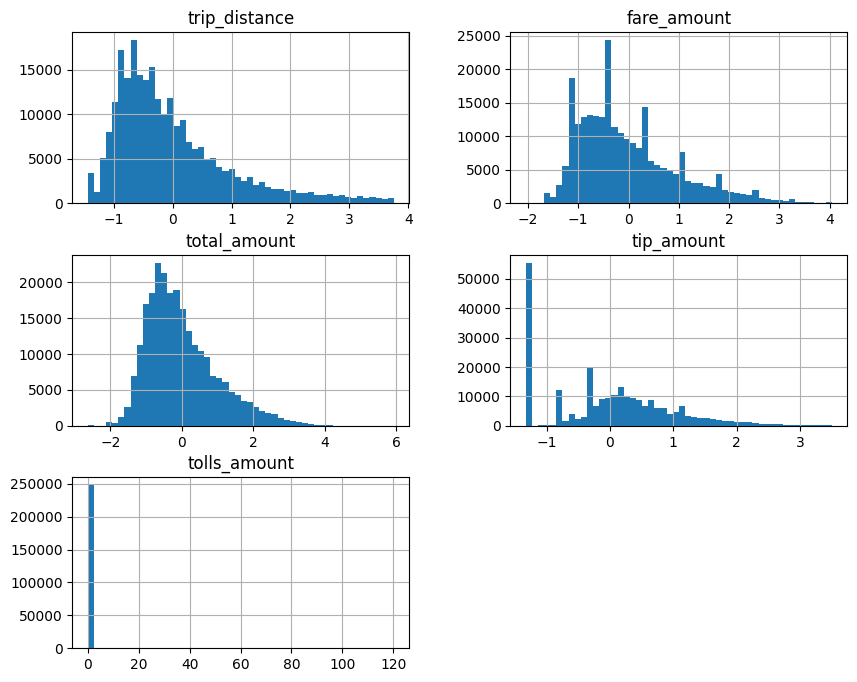

In [ ]:
numeric_cols = ["trip_distance", "fare_amount", "total_amount", "tip_amount", "tolls_amount"]
df[numeric_cols].hist(figsize=(10, 8), bins=50)
plt.show()

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

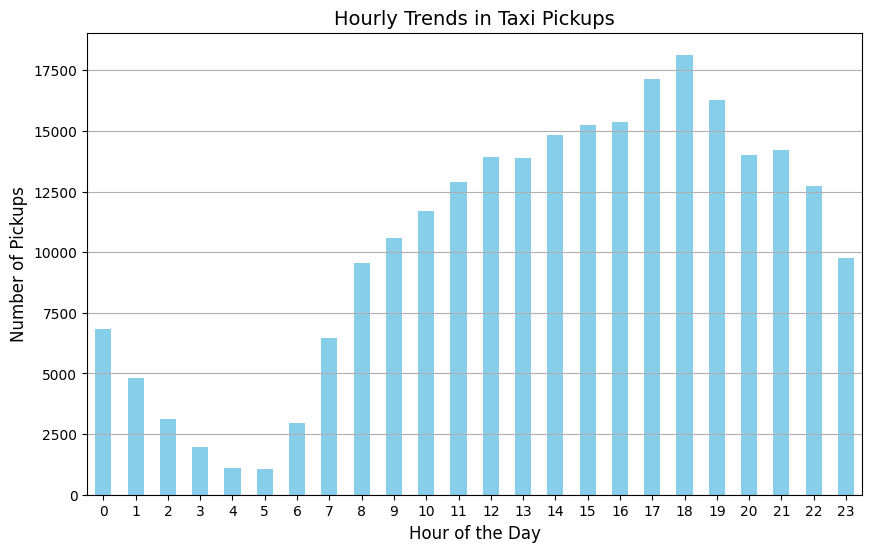

In [ ]:
# Find and show the hourly trends in taxi pickups

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_pickups = df.groupby('pickup_hour').size()

plt.figure(figsize=(10, 6))
hourly_pickups.plot(kind='bar', color='skyblue')
plt.title('Hourly Trends in Taxi Pickups', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


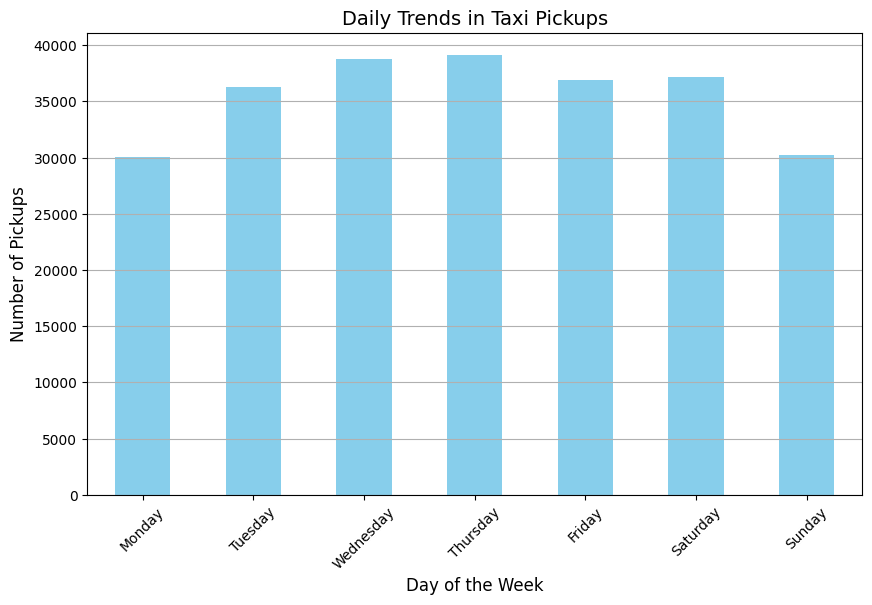

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['pickup_day_of_week_name'] = df['pickup_day_of_week'].map(lambda x: day_names[x])

daily_pickups = df.groupby('pickup_day_of_week_name').size()

plt.figure(figsize=(10, 6))
daily_pickups = daily_pickups[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]  # Reorder by actual days of the week
daily_pickups.plot(kind='bar', color='skyblue')
plt.title('Daily Trends in Taxi Pickups', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


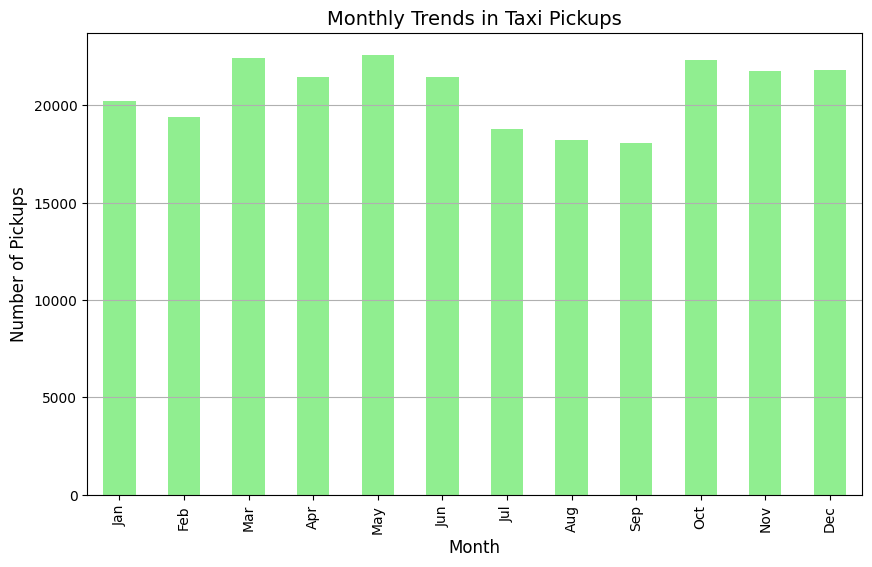

In [ ]:
# Show the monthly trends in pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
monthly_pickups = df.groupby('pickup_month').size()


plt.figure(figsize=(10, 6))
monthly_pickups.plot(kind='bar', color='lightgreen')
plt.title('Monthly Trends in Taxi Pickups', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
financial_parameters = ['fare_amount', 'tip_amount', 'total_amount']
distance_parameters = ['trip_distance']


zero_negative_fare = df[df['fare_amount'] <= 0]
zero_negative_tip = df[df['tip_amount'] <= 0]
zero_negative_total = df[df['total_amount'] <= 0]
zero_negative_trip_distance = df[df['trip_distance'] <= 0]


print(f"Rows with zero or negative fare_amount: {zero_negative_fare.shape[0]}")
print(f"Rows with zero or negative tip_amount: {zero_negative_tip.shape[0]}")
print(f"Rows with zero or negative total_amount: {zero_negative_total.shape[0]}")
print(f"Rows with zero or negative trip_distance: {zero_negative_trip_distance.shape[0]}")


print("\nSample rows with zero/negative fare_amount:")
print(zero_negative_fare.head())

print("\nSample rows with zero/negative tip_amount:")
print(zero_negative_tip.head())

print("\nSample rows with zero/negative total_amount:")
print(zero_negative_total.head())

print("\nSample rows with zero/negative trip_distance:")
print(zero_negative_trip_distance.head())


Rows with zero or negative fare_amount: 149161
Rows with zero or negative tip_amount: 121964
Rows with zero or negative total_amount: 146886
Rows with zero or negative trip_distance: 154560

Sample rows with zero/negative fare_amount:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-24 22:59:46   2023-12-24 23:10:10              1.0   
1         2  2023-05-13 21:12:39   2023-05-13 21:21:45              1.0   
4         2  2023-02-17 15:39:58   2023-02-17 15:49:57              1.0   
6         2  2023-10-02 10:38:46   2023-10-02 10:44:48              1.0   
7         2  2023-10-04 14:59:37   2023-10-04 15:11:49              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0       0.195631         1.0           161           141             1   
1      -0.104997         1.0           163           170             2   
4      -0.127544         1.0           151           142             1   
6      -0.826504  

In [ ]:
df_clean = df.copy()

# Remove records with zero or negative values for key columns
df_clean = df_clean[
    (df_clean["fare_amount"] > 0) &
    (df_clean["tip_amount"] >= 0) &
    (df_clean["total_amount"] > 0) &
    (df_clean["trip_distance"] > 0)
]

# Print before & after shape
print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size: {df_clean.shape[0]}")

# Optional: Save both datasets for comparison
df.to_csv("nyc_taxi_raw.csv", index=False)
df_clean.to_csv("nyc_taxi_cleaned.csv", index=False)

Original dataset size: 248580
Cleaned dataset size: 54860


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
df_clean = df_clean[(df_clean['fare_amount'] > 0) & (df_clean['tip_amount'] > 0) &
                (df_clean['total_amount'] > 0)]

print(f"Original DataFrame shape: {df_clean.shape}")
print(f"Cleaned DataFrame shape (after removing zero/negative values for financial parameters): {df_clean.shape}")


zero_distance_df = df_clean[df_clean['trip_distance'] == 0]
print(f"Rows with trip_distance == 0 (same zone): {zero_distance_df.shape[0]}")


Original DataFrame shape: (54860, 24)
Cleaned DataFrame shape (after removing zero/negative values for financial parameters): (54860, 24)
Rows with trip_distance == 0 (same zone): 0


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

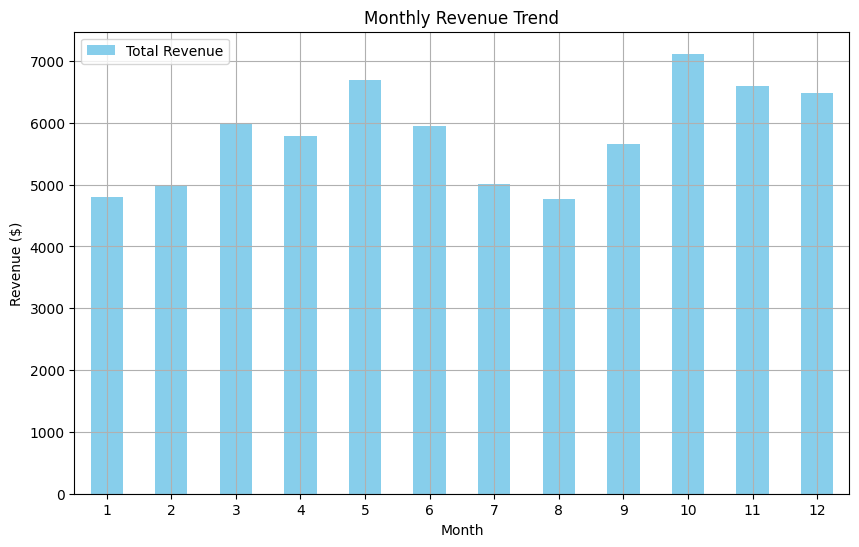

                      sum      mean    median       std
pickup_month                                           
1             4799.745902  1.125908  0.980292  0.752279
2             5000.318061  1.184909  1.027875  0.781479
3             5997.944643  1.211461  1.042902  0.800774
4             5778.941947  1.231134  1.067319  0.809386
5             6686.633032  1.296864  1.143076  0.828566
6             5956.022710  1.263743  1.087980  0.826795
7             5009.256170  1.251063  1.086728  0.831386
8             4762.833567  1.209455  1.042902  0.788697
9             5664.581591  1.388038  1.243251  0.876725
10            7117.776482  1.358873  1.193164  0.854438
11            6595.192128  1.342943  1.193164  0.850573
12            6474.365759  1.380168  1.208190  0.880334


In [ ]:
# Group data by month and analyse monthly revenue

df_clean['tpep_pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'])


df_clean['pickup_month'] = df_clean['tpep_pickup_datetime'].dt.month

monthly_revenue_stats = df_clean.groupby('pickup_month')['total_amount'].agg(['sum', 'mean', 'median', 'std'])

plt.figure(figsize=(10, 6))
monthly_revenue_stats['sum'].plot(kind='bar', color='skyblue', label='Total Revenue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend()
plt.show()

print(monthly_revenue_stats)

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

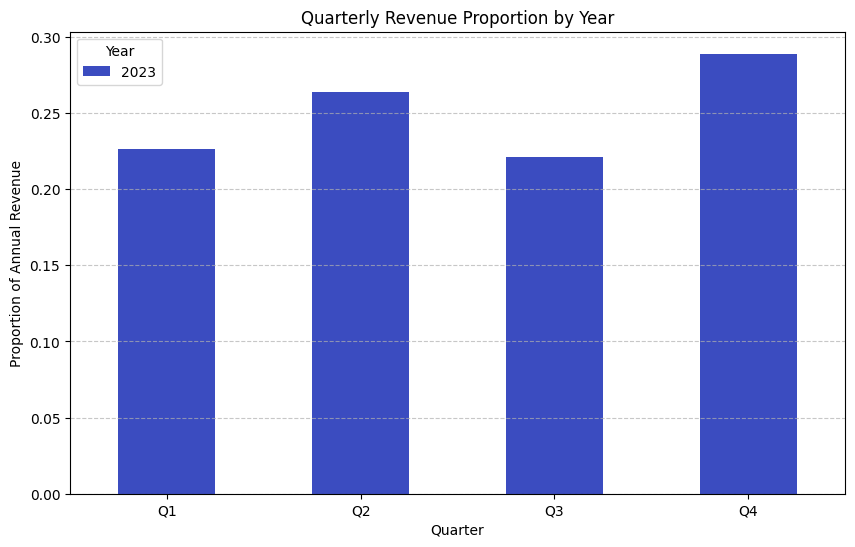

   year  quarter  total_amount  yearly_total  proportion
0  2023        1  15798.008606   69843.61199    0.226191
1  2023        2  18421.597688   69843.61199    0.263755
2  2023        3  15436.671327   69843.61199    0.221018
3  2023        4  20187.334369   69843.61199    0.289036


In [ ]:
# Calculate proportion of each quarter

df_clean['tpep_pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'])
df_clean['year'] = df_clean['tpep_pickup_datetime'].dt.year
df_clean['quarter'] = df_clean['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = df_clean.groupby(['year', 'quarter'])['total_amount'].sum().reset_index()
yearly_revenue = df_clean.groupby('year')['total_amount'].sum().reset_index()
yearly_revenue.rename(columns={'total_amount': 'yearly_total'}, inplace=True)

quarterly_revenue = quarterly_revenue.merge(yearly_revenue, on='year')
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / quarterly_revenue['yearly_total']
pivot_quarterly = quarterly_revenue.pivot(index="quarter", columns="year", values="proportion")


plt.figure(figsize=(10, 6))
pivot_quarterly.plot(kind="bar", stacked=True, colormap="coolwarm", ax=plt.gca())
plt.title("Quarterly Revenue Proportion by Year")
plt.xlabel("Quarter")
plt.ylabel("Proportion of Annual Revenue")
plt.xticks(range(4), labels=["Q1", "Q2", "Q3", "Q4"], rotation=0)
plt.legend(title="Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

print(quarterly_revenue)

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

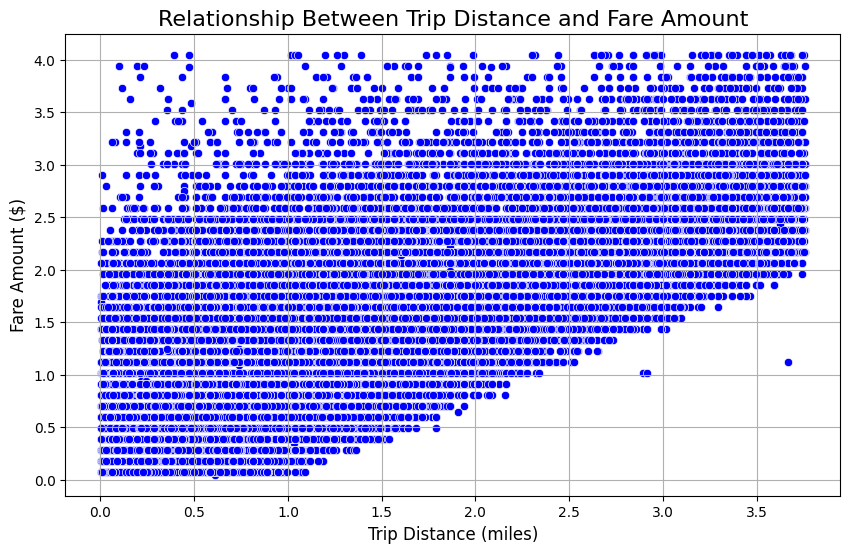

Correlation between trip_distance and fare_amount: 0.7553425680299665


In [ ]:
# Show how trip fare is affected by distance

df_filtered = df_clean[df_clean['trip_distance'] > 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='trip_distance', y='fare_amount', color='blue')

plt.title('Relationship Between Trip Distance and Fare Amount', fontsize=16)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(True)
plt.show()

correlation = df_filtered['trip_distance'].corr(df_filtered['fare_amount'])
print(f'Correlation between trip_distance and fare_amount: {correlation}')

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

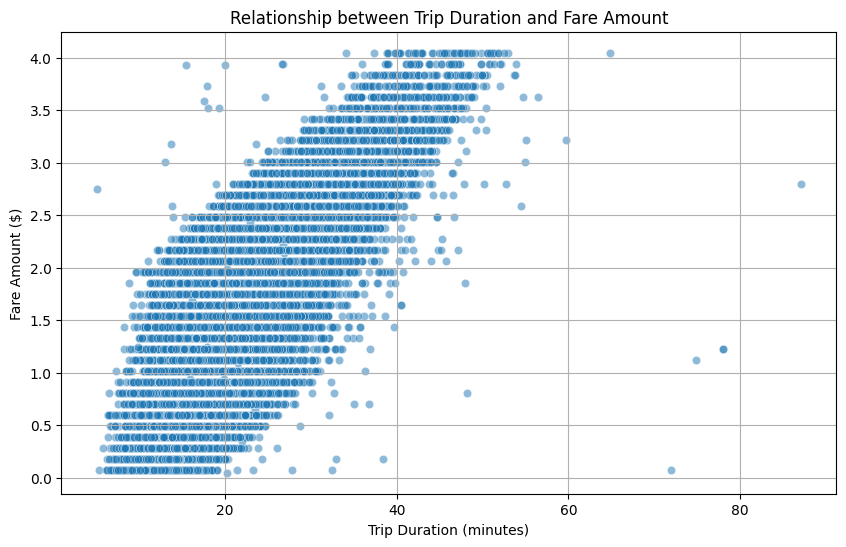

Correlation between Trip Duration and Fare Amount:
               trip_duration  fare_amount
trip_duration       1.000000     0.832358
fare_amount         0.832358     1.000000


In [ ]:
# Show relationship between fare and trip duration

# Convert datetime columns
df_clean['tpep_pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'])
df_clean['tpep_dropoff_datetime'] = pd.to_datetime(df_clean['tpep_dropoff_datetime'])

df_clean['trip_duration'] = (df_clean['tpep_dropoff_datetime'] - df_clean['tpep_pickup_datetime']).dt.total_seconds() / 60

df_filtered = df_clean[(df_clean['trip_duration'] > 1) & (df_clean['trip_duration'] <= 180)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['trip_duration'], y=df_filtered['fare_amount'], alpha=0.5)
plt.title("Relationship between Trip Duration and Fare Amount")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)

plt.show()

correlation = df_filtered[['trip_duration', 'fare_amount']].corr()
print("Correlation between Trip Duration and Fare Amount:")
print(correlation)

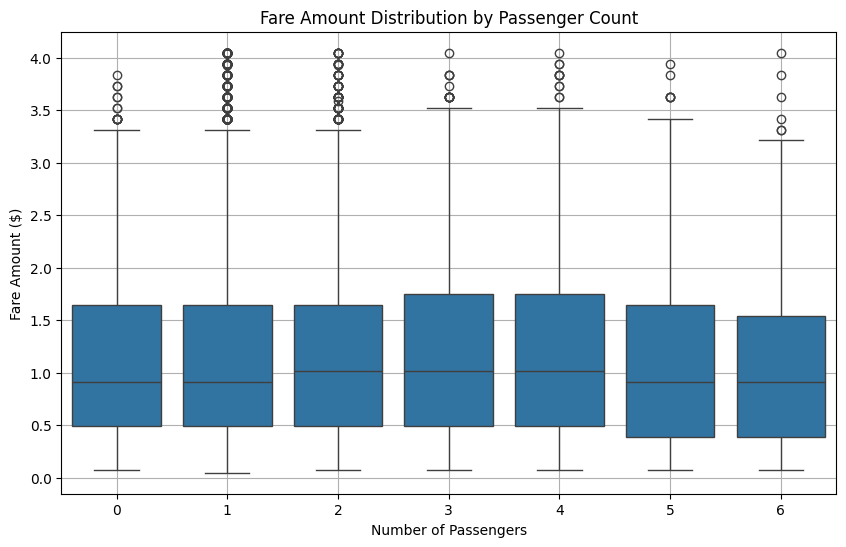

                     mean    median  count
passenger_count                           
0                1.126601  0.912434    748
1                1.116491  0.912434  41518
2                1.142830  1.017001   8232
3                1.173774  1.017001   2031
4                1.189190  1.017001   1065
5                1.098502  0.912434    748
6                1.070698  0.912434    518
Correlation between Passenger Count and Fare Amount:
                 passenger_count  fare_amount
passenger_count         1.000000     0.009002
fare_amount             0.009002     1.000000


In [ ]:
# Show relationship between fare and number of passengers

df_clean['passenger_count'] = df_clean['passenger_count'].astype(int)

passenger_fare_stats = df_clean.groupby('passenger_count')['fare_amount'].agg(['mean', 'median', 'count'])

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['passenger_count'], y=df_clean['fare_amount'])
plt.title("Fare Amount Distribution by Passenger Count")
plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()

print(passenger_fare_stats)

correlation = df_clean[['passenger_count', 'fare_amount']].corr()
print("Correlation between Passenger Count and Fare Amount:")
print(correlation)


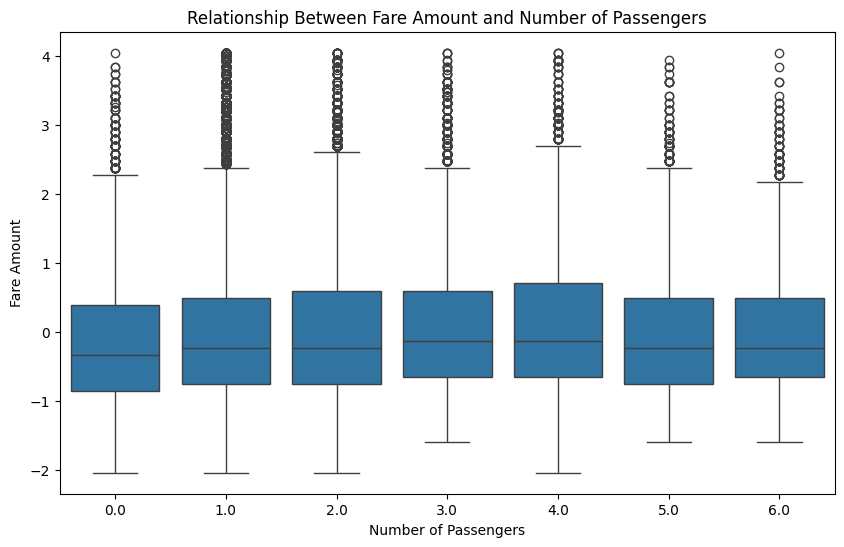

In [ ]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='passenger_count', y='fare_amount')

plt.title('Relationship Between Fare Amount and Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')

plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

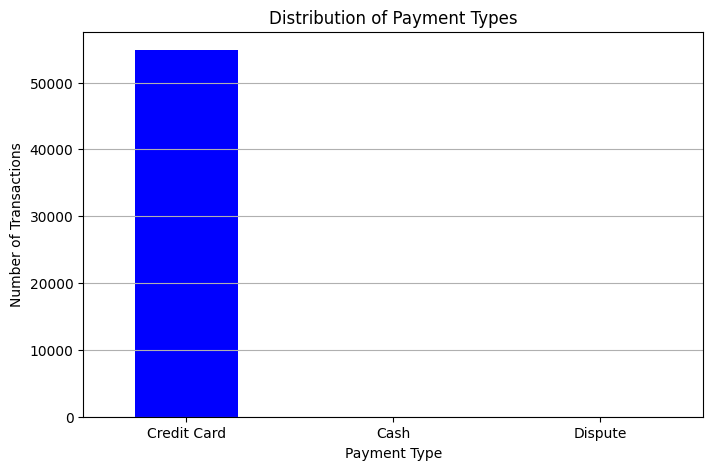

Payment Type Distribution:
 payment_type
Credit Card    54857
Cash               2
Dispute            1
Name: count, dtype: int64

Payment Type Proportions (%):
 payment_type
Credit Card    99.994532
Cash            0.003646
Dispute         0.001823
Name: proportion, dtype: float64


In [ ]:
# Analyse the distribution of different payment types (payment_type).

payment_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute"
}

df_clean['payment_type'] = df_clean['payment_type'].map(payment_mapping)
payment_counts = df_clean['payment_type'].value_counts()
payment_proportions = df_clean['payment_type'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
payment_counts.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

print("Payment Type Distribution:\n", payment_counts)
print("\nPayment Type Proportions (%):\n", payment_proportions)


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
# zones = # read the .shp file using gpd
zones = gpd.read_file("/content/drive/MyDrive/EDA-Assignment/Datasets and Dictionary/taxi_zones/taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

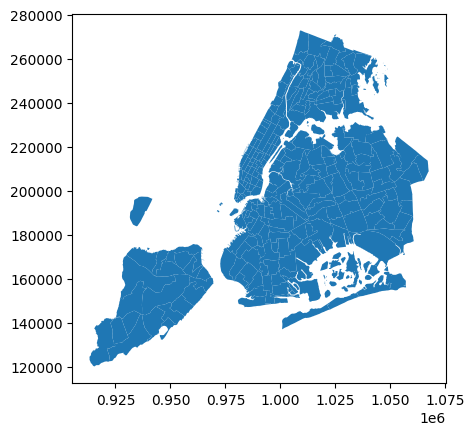

In [ ]:
# print(zones.info())
# zones.plot()

print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [93]:
# Merge zones and trip records using locationID and PULocationID
df_clean['PULocationID'] = df_clean['PULocationID'].astype(int)
df_clean['DOLocationID'] = df_clean['DOLocationID'].astype(int)
zones['LocationID'] = zones['LocationID'].astype(int)

df_merged = df_clean.merge(zones[['LocationID', 'borough', 'zone']],
                           left_on='PULocationID',
                           right_on='LocationID',
                           how='left')

df_merged = df_merged.rename(columns={'borough': 'pickup_borough', 'zone': 'pickup_zone'})
df_merged = df_merged.merge(zones[['LocationID', 'borough', 'zone']],
                           left_on='DOLocationID',
                           right_on='LocationID',
                           how='left',
                           suffixes=('_pickup', '_dropoff'))

df_merged = df_merged.rename(columns={'borough': 'dropoff_borough', 'zone': 'dropoff_zone'})

df_merged = df_merged.drop(columns=['LocationID_pickup', 'LocationID_dropoff'], errors='ignore')

df_merged[['PULocationID', 'pickup_borough', 'pickup_zone', 'DOLocationID', 'dropoff_borough', 'dropoff_zone']].head()


PULocationID pickup_borough          pickup_zone  DOLocationID  \
0           142      Manhattan  Lincoln Square East           239   
1            79      Manhattan         East Village           236   
2           140      Manhattan      Lenox Hill East           238   
3           249      Manhattan         West Village           142   
4           151      Manhattan     Manhattan Valley           233   

  dropoff_borough           dropoff_zone  
0       Manhattan  Upper West Side South  
1       Manhattan  Upper East Side North  
2       Manhattan  Upper West Side North  
3       Manhattan    Lincoln Square East  
4       Manhattan    UN/Turtle Bay South

from matplotlib import pyplot as plt
_df_0['PULocationID'].plot(kind='hist', bins=20, title='PULocationID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['DOLocationID'].plot(kind='hist', bins=20, title='DOLocationID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('pickup_zone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('dropoff_zone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='PULocationID', y='DOLocationID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['PULocationID'].plot(kind='line', figsize=(8, 4), title='PULocationID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['DOLocationID'].plot(kind='line', figsize=(8, 4), title='DOLocationID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['dropoff_zone'].value_counts()
    for x_label, grp in _df_7.groupby('pickup_zone')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('pickup_zone')
_ = plt.ylabel('dropoff_zone')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['pickup_zone'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='PULocationID', y='pickup_zone', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['dropoff_zone'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='PULocationID', y='dropoff_zone', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['pickup_zone'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='DOLocationID', y='pickup_zone', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['dropoff_zone'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='DOLocationID', y='dropoff_zone', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [94]:
# Group data by location and calculate the number of trips

pickup_counts = df_merged.groupby(['pickup_borough', 'pickup_zone']).size().reset_index(name='pickup_trips')

dropoff_counts = df_merged.groupby(['dropoff_borough', 'dropoff_zone']).size().reset_index(name='dropoff_trips')
trip_counts = pickup_counts.merge(dropoff_counts,
                                  left_on=['pickup_borough', 'pickup_zone'],
                                  right_on=['dropoff_borough', 'dropoff_zone'],
                                  how='outer').fillna(0)
trip_counts = trip_counts.rename(columns={'pickup_borough': 'borough',
                                          'pickup_zone': 'zone'})
trip_counts = trip_counts.drop(columns=['dropoff_borough', 'dropoff_zone'])
trip_counts['total_trips'] = trip_counts['pickup_trips'] + trip_counts['dropoff_trips']
trip_counts = trip_counts.sort_values(by='total_trips', ascending=False)

print(trip_counts.head(10))

       borough                          zone  pickup_trips  dropoff_trips  \
106  Manhattan         Upper East Side North        2111.0         2304.0   
88   Manhattan                Midtown Center        2458.0         1505.0   
107  Manhattan         Upper East Side South        1941.0         1461.0   
109  Manhattan         Upper West Side South        1658.0         1676.0   
62   Manhattan                  East Chelsea        1856.0         1377.0   
89   Manhattan                  Midtown East        2039.0         1181.0   
94   Manhattan  Penn Station/Madison Sq West        2262.0          926.0   
81   Manhattan           Lincoln Square East        1792.0         1383.0   
65   Manhattan                  East Village        1732.0         1411.0   
101  Manhattan     Times Sq/Theatre District        1886.0         1108.0   

     total_trips  
106       4415.0  
88        3963.0  
107       3402.0  
109       3334.0  
62        3233.0  
89        3220.0  
94        3188.0  


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [95]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = zones.merge(trip_counts, on=['borough', 'zone'], how='left')
zones_with_trips['total_trips'] = zones_with_trips['total_trips'].fillna(0)
print(zones_with_trips.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   pickup_trips  dropoff_trips  total_trips  
0           NaN            NaN          0.0  
1           NaN         

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

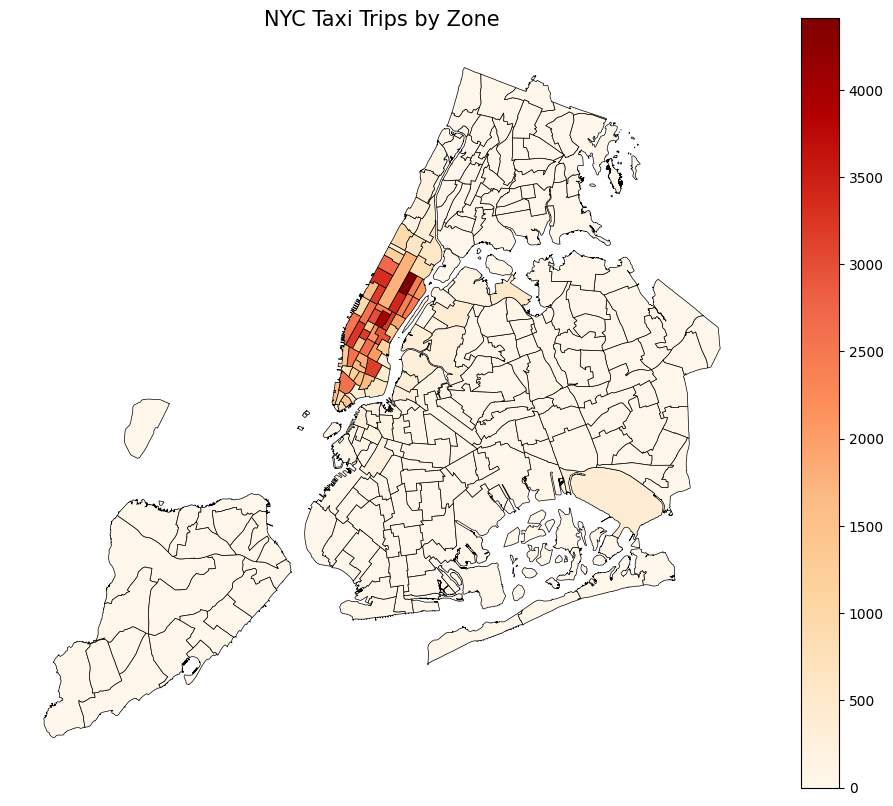

In [96]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones_with_trips.plot(
    column='total_trips',  # Color zones by total trips
    cmap='OrRd',           # Choose a color map (Oranges-Red)
    linewidth=0.5,         # Set boundary line width
    edgecolor='black',     # Set boundary line color
    legend=True,           # Show legend
    ax=ax                  # Set the axis
)
ax.set_title("NYC Taxi Trips by Zone", fontsize=15)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.show()


In [97]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = zones_with_trips.sort_values(by='total_trips', ascending=False)
print(sorted_zones[['zone', 'borough', 'total_trips']].head(10))


                             zone    borough  total_trips
235         Upper East Side North  Manhattan       4415.0
160                Midtown Center  Manhattan       3963.0
236         Upper East Side South  Manhattan       3402.0
238         Upper West Side South  Manhattan       3334.0
67                   East Chelsea  Manhattan       3233.0
161                  Midtown East  Manhattan       3220.0
185  Penn Station/Madison Sq West  Manhattan       3188.0
141           Lincoln Square East  Manhattan       3175.0
78                   East Village  Manhattan       3143.0
229     Times Sq/Theatre District  Manhattan       2994.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [99]:
# Find routes which have the slowest speeds at different times of the day

df_clean['tpep_pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'])
df_clean['tpep_dropoff_datetime'] = pd.to_datetime(df_clean['tpep_dropoff_datetime'])
df_clean['trip_time'] = (df_clean['tpep_dropoff_datetime'] - df_clean['tpep_pickup_datetime']).dt.total_seconds() / 60
df_clean = df_clean[df_clean['trip_time'] > 0]
df_clean['pickup_hour'] = df_clean['tpep_pickup_datetime'].dt.hour

route_speed = df_clean.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    avg_duration=('trip_time', 'mean'),
    total_distance=('trip_distance', 'sum')
).reset_index()

route_speed = route_speed[route_speed['avg_duration'] > 0]
route_speed['speed_mph'] = route_speed['total_distance'] / (route_speed['avg_duration'] / 60)

slowest_routes_by_hour = route_speed.loc[route_speed.groupby('pickup_hour')['speed_mph'].idxmin()]

How does identifying high-traffic, high-demand routes help us?

**Identifying high-traffic and high-demand routes provides several key benefits, especially in the context of ride-hailing, taxi services, and urban mobility planning**

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

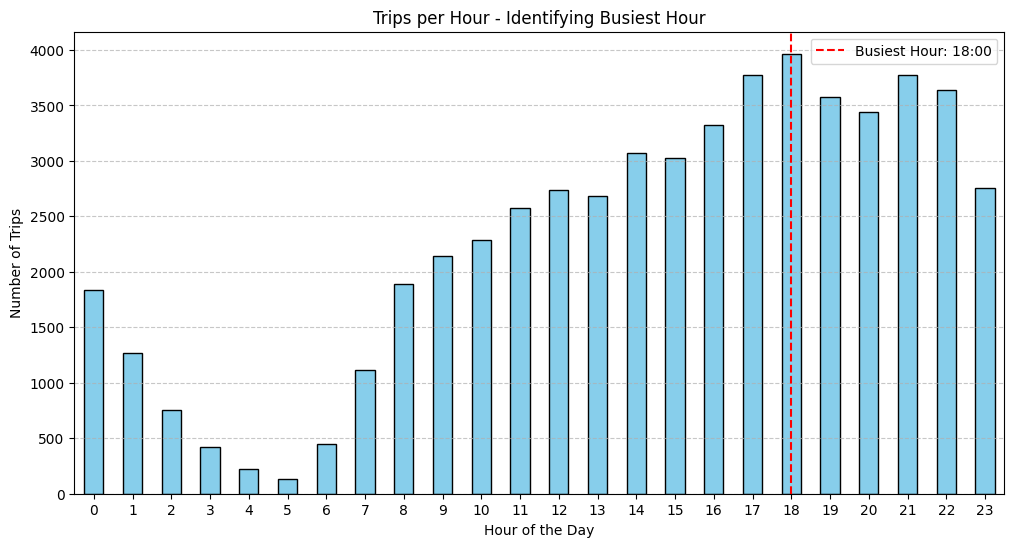

In [100]:
# Visualise the number of trips per hour and find the busiest hour

df_clean['pickup_hour'] = df_clean['tpep_pickup_datetime'].dt.hour
hourly_trips = df_clean.groupby('pickup_hour').size()
plt.figure(figsize=(12, 6))
hourly_trips.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Trips per Hour - Identifying Busiest Hour')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the busiest hour
busiest_hour = hourly_trips.idxmax()
plt.axvline(busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour}:00')
plt.legend()

plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [102]:
# Scale up the number of trips
df_clean['trip_count'] = df_clean.groupby(['PULocationID', 'DOLocationID'])['tpep_pickup_datetime'].transform('count')
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.10
df_clean['scaled_trip_count'] = df_clean['trip_count'] / sample_fraction
hourly_trips = df_clean.groupby('pickup_hour').size() / sample_fraction
zone_trips = df_clean.groupby('PULocationID').size() / sample_fraction


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

<Figure size 1200x600 with 0 Axes>

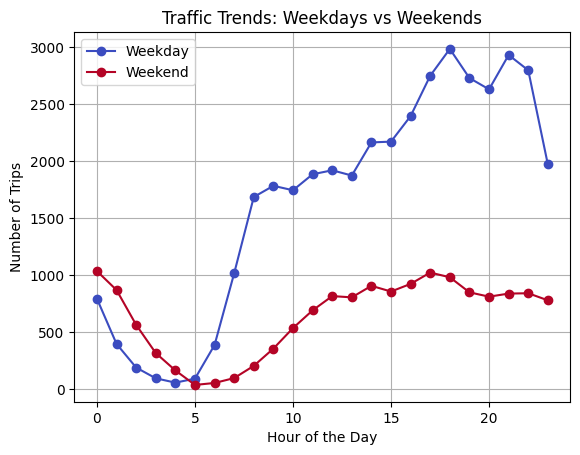

In [103]:
# Find top 10 pickup and dropoff zones

df_clean['pickup_day'] = df_clean['tpep_pickup_datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
df_clean['is_weekend'] = df_clean['pickup_day'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
traffic_trends = df_clean.groupby(['is_weekend', 'pickup_hour']).size().unstack(0)

plt.figure(figsize=(12, 6))
traffic_trends.plot(kind='line', marker='o', linestyle='-', colormap='coolwarm')

plt.title('Traffic Trends: Weekdays vs Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(['Weekday', 'Weekend'])
plt.grid(True)
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [104]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = df_clean['PULocationID'].value_counts().rename("pickup_count")
dropoff_counts = df_clean['DOLocationID'].value_counts().rename("dropoff_count")
zone_counts = pd.DataFrame({'pickup_count': pickup_counts, 'dropoff_count': dropoff_counts}).fillna(0)
zone_counts['pickup_dropoff_ratio'] = zone_counts['pickup_count'] / (zone_counts['dropoff_count'] + 1)  # Avoid division by zero

top_10_zones  = zone_counts.nlargest(10, 'pickup_dropoff_ratio')
bottom_10_zones = zone_counts.nsmallest(10, 'pickup_dropoff_ratio')

print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_zones)

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom_10_zones)

Top 10 Pickup/Dropoff Ratios:
     pickup_count  dropoff_count  pickup_dropoff_ratio
138         504.0           13.0             36.000000
132         369.0           10.0             33.545455
70           87.0            3.0             21.750000
186        2262.0          926.0              2.440129
162        2039.0         1181.0              1.725042
100         830.0          482.0              1.718427
230        1886.0         1108.0              1.700631
43         1110.0          661.0              1.676737
161        2458.0         1505.0              1.632138
164        1295.0          840.0              1.539834

Bottom 10 Pickup/Dropoff Ratios:
    pickup_count  dropoff_count  pickup_dropoff_ratio
10           0.0           69.0                   0.0
14           0.0            1.0                   0.0
38           0.0            2.0                   0.0
53           0.0           10.0                   0.0
56           0.0            7.0                   0.0
62     

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [105]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

df_night = df_clean[(df_clean['tpep_pickup_datetime'].dt.hour >= 23) |
                     (df_clean['tpep_pickup_datetime'].dt.hour < 5)]

night_pickup_counts = df_night['PULocationID'].value_counts().rename("pickup_count")
night_dropoff_counts = df_night['DOLocationID'].value_counts().rename("dropoff_count")

night_zone_counts = pd.DataFrame({'pickup_count': night_pickup_counts, 'dropoff_count': night_dropoff_counts}).fillna(0)
top_10_night_pickups = night_zone_counts.nlargest(10, 'pickup_count')
top_10_night_dropoffs = night_zone_counts.nlargest(10, 'dropoff_count')

print("Top 10 Pickup Zones (Night Hours):")
print(top_10_night_pickups)

print("\nTop 10 Dropoff Zones (Night Hours):")
print(top_10_night_dropoffs)


Top 10 Pickup Zones (Night Hours):
     pickup_count  dropoff_count
79          644.0          190.0
249         519.0           76.0
148         478.0          107.0
48          384.0          192.0
114         379.0           59.0
186         259.0           44.0
230         258.0           73.0
164         249.0           62.0
68          234.0          116.0
234         197.0           40.0

Top 10 Dropoff Zones (Night Hours):
     pickup_count  dropoff_count
263         105.0          317.0
141         103.0          235.0
236          42.0          231.0
239          69.0          217.0
238          31.0          214.0
48          384.0          192.0
79          644.0          190.0
262          19.0          185.0
142         179.0          162.0
87           70.0          159.0


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [107]:
# Filter for night hours (11 PM to 5 AM)
df_night = df_clean[(df_clean['tpep_pickup_datetime'].dt.hour >= 23) |
                     (df_clean['tpep_pickup_datetime'].dt.hour < 5)]
print(df_night)

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
16             2  2023-01-21 01:25:38   2023-01-21 01:42:46                1   
71             2  2023-11-09 23:03:19   2023-11-09 23:16:43                1   
81             2  2023-09-07 23:17:13   2023-09-07 23:50:56                6   
93             1  2023-06-18 03:12:41   2023-06-18 03:22:32                1   
111            2  2023-04-22 02:16:22   2023-04-22 02:30:34                1   
...          ...                  ...                   ...              ...   
299858         2  2023-02-28 23:04:49   2023-02-28 23:21:27                1   
299876         2  2023-04-24 23:25:26   2023-04-24 23:39:32                1   
299877         1  2023-09-16 01:59:57   2023-09-16 02:22:43                1   
299902         2  2023-02-18 23:58:28   2023-02-19 00:17:26                1   
299978         2  2023-06-11 03:18:38   2023-06-11 03:38:34                1   

        trip_distance  RatecodeID  PULo

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

                     mean    median         std  count
passenger_count                                       
1                7.548441  0.913468  137.853857  41518
2                3.748969  0.456417   86.069133   8232
3                1.747695  0.310182   25.020857   2031
4                1.937013  0.235664   22.386572   1065
5                0.809479  0.177642    9.764218    748
6                2.020123  0.159695   22.751132    518


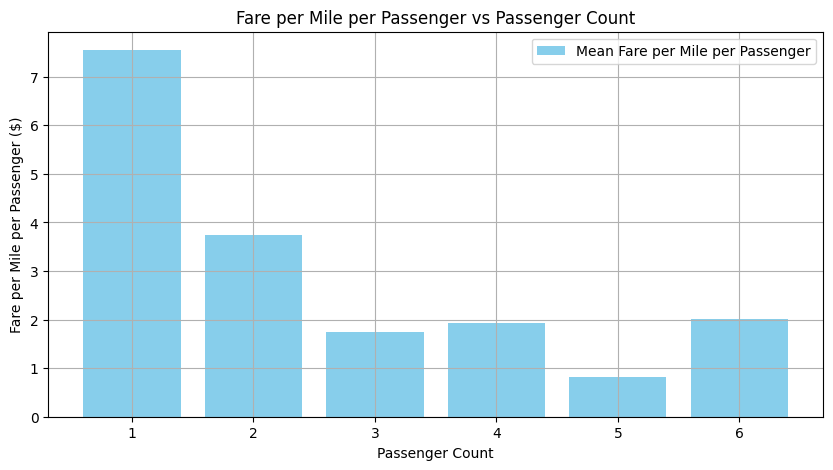

In [108]:
# Analyse the fare per mile per passenger for different passenger counts
df_clean['fare_per_mile_per_passenger'] = df_clean['fare_amount'] / (df_clean['trip_distance'] * df_clean['passenger_count'])
df_clean = df_clean.replace([np.inf, -np.inf], np.nan)
df_clean = df_clean.dropna(subset=['fare_per_mile_per_passenger'])
fare_stats = df_clean.groupby('passenger_count')['fare_per_mile_per_passenger'].agg(['mean', 'median', 'std', 'count'])
print(fare_stats)

plt.figure(figsize=(10, 5))
plt.bar(fare_stats.index, fare_stats['mean'], color='skyblue', label='Mean Fare per Mile per Passenger')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger ($)')
plt.title('Fare per Mile per Passenger vs Passenger Count')
plt.xticks(range(1, int(df_clean['passenger_count'].max()) + 1))
plt.legend()
plt.grid()
plt.show()



**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

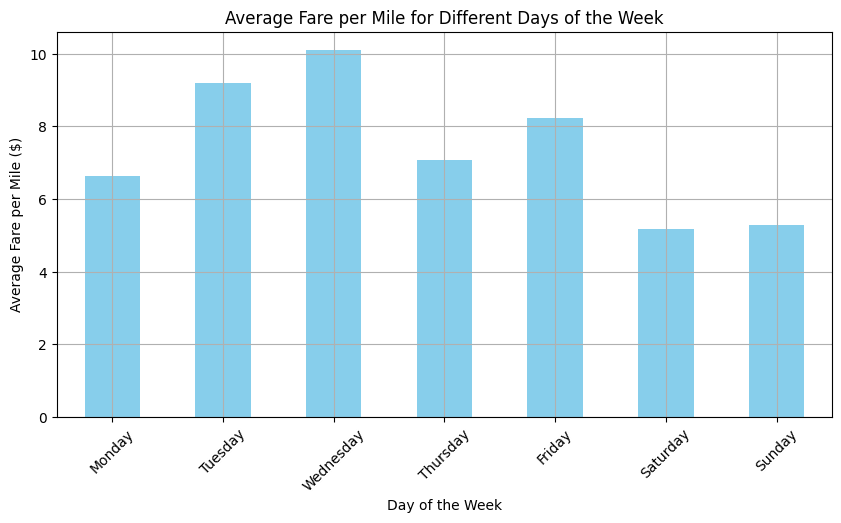

In [109]:
# Compare the average fare per mile for different days and for different times of the day
df_clean['fare_per_mile'] = df_clean['fare_amount'] / df_clean['trip_distance']
df_clean = df_clean.replace([np.inf, -np.inf], np.nan).dropna(subset=['fare_per_mile'])

df_clean['pickup_day'] = df_clean['tpep_pickup_datetime'].dt.day_name()
df_clean['pickup_hour'] = df_clean['tpep_pickup_datetime'].dt.hour

avg_fare_by_day = df_clean.groupby('pickup_day')['fare_per_mile'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10, 5))
avg_fare_by_day.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile ($)')
plt.title('Average Fare per Mile for Different Days of the Week')
plt.xticks(rotation=45)
plt.grid()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


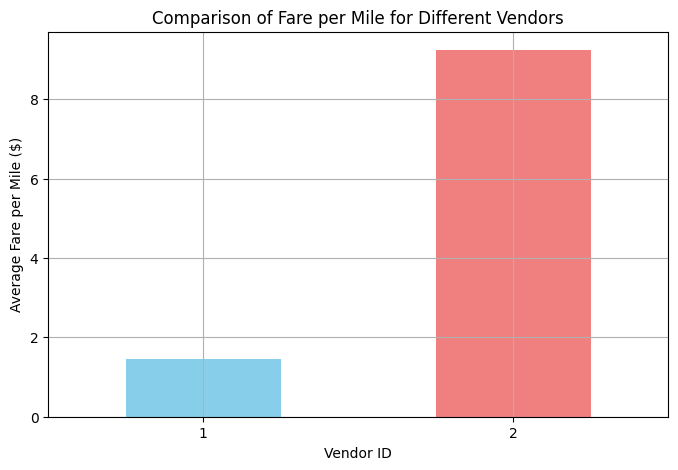

In [110]:
# Defining distance tiers

df_clean['fare_per_mile'] = df_clean['fare_amount'] / df_clean['trip_distance']
df_clean = df_clean.replace([np.inf, -np.inf], np.nan).dropna(subset=['fare_per_mile'])
avg_fare_by_vendor = df_clean.groupby('VendorID')['fare_per_mile'].mean()

plt.figure(figsize=(8, 5))
avg_fare_by_vendor.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile ($)')
plt.title('Comparison of Fare per Mile for Different Vendors')
plt.xticks(rotation=0)
plt.grid()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

<ipython-input-111-2dde26e69cd6>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_distance = df_clean.groupby('distance_bins')['tip_percentage'].mean()


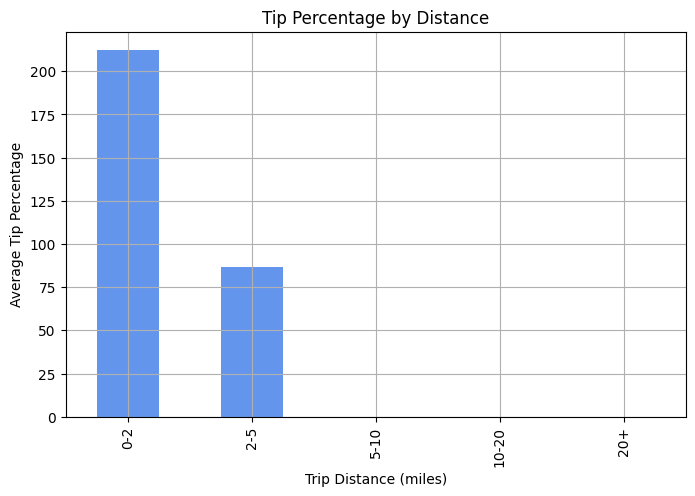

In [111]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_clean['tip_percentage'] = (df_clean['tip_amount'] / df_clean['fare_amount']) * 100
df_clean = df_clean.replace([np.inf, -np.inf], np.nan).dropna(subset=['tip_percentage'])
df_clean['distance_bins'] = pd.cut(df_clean['trip_distance'], bins=[0, 2, 5, 10, 20, np.inf], labels=['0-2', '2-5', '5-10', '10-20', '20+'])

tip_by_distance = df_clean.groupby('distance_bins')['tip_percentage'].mean()
tip_by_distance.plot(kind='bar', color='cornflowerblue', figsize=(8, 5))
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Average Tip Percentage')
plt.title('Tip Percentage by Distance')
plt.grid()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

<ipython-input-112-3ca6ae6773c8>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_comparison = df_clean.groupby('tip_category')[['trip_distance', 'fare_amount']].mean()
<ipython-input-112-3ca6ae6773c8>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_passenger = df_clean.groupby(['tip_category', 'passenger_count']).size().unstack().fillna(0)


                 trip_distance  fare_amount
tip_category                               
Low (<10%)            1.898951     1.948988
Medium (10-25%)       1.532450     1.583757
High (>25%)           1.125956     1.095480


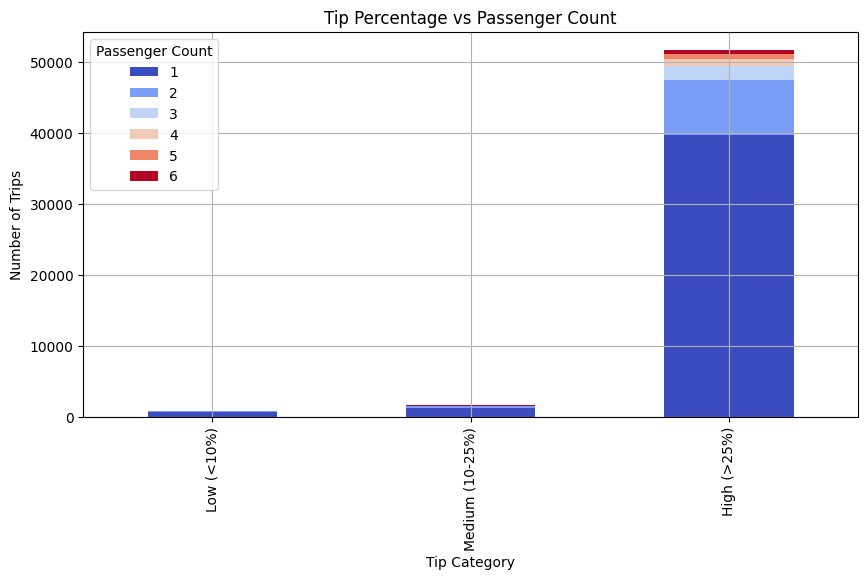

In [112]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
df_clean['tip_category'] = pd.cut(
    df_clean['tip_percentage'],
    bins=[-np.inf, 10, 25, np.inf],
    labels=['Low (<10%)', 'Medium (10-25%)', 'High (>25%)']
)

tip_comparison = df_clean.groupby('tip_category')[['trip_distance', 'fare_amount']].mean()
print(tip_comparison)
tip_passenger = df_clean.groupby(['tip_category', 'passenger_count']).size().unstack().fillna(0)

tip_passenger.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='coolwarm')
plt.xlabel('Tip Category')
plt.ylabel('Number of Trips')
plt.title('Tip Percentage vs Passenger Count')
plt.legend(title='Passenger Count')
plt.grid()
plt.show()


<ipython-input-113-ea07b8d19ab9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_hour = df_clean.groupby(['pickup_hour', 'tip_category']).size().unstack().fillna(0)


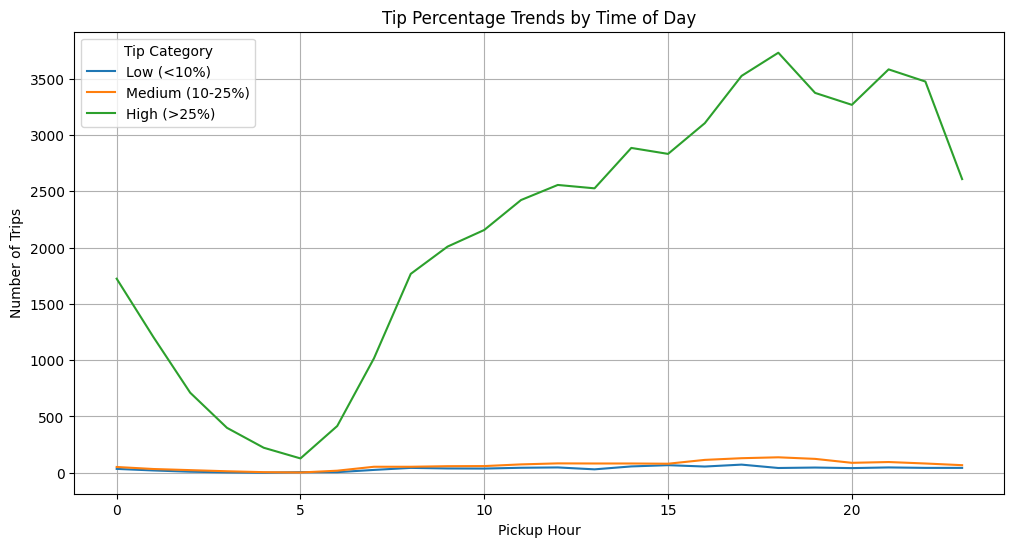

In [113]:
tip_by_hour = df_clean.groupby(['pickup_hour', 'tip_category']).size().unstack().fillna(0)

tip_by_hour.plot(figsize=(12, 6))
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Trips')
plt.title('Tip Percentage Trends by Time of Day')
plt.legend(title='Tip Category')
plt.grid()
plt.show()

<ipython-input-114-fa1e1a37b204>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_payment = df_clean.groupby(['tip_category', 'payment_type']).size().unstack().fillna(0)


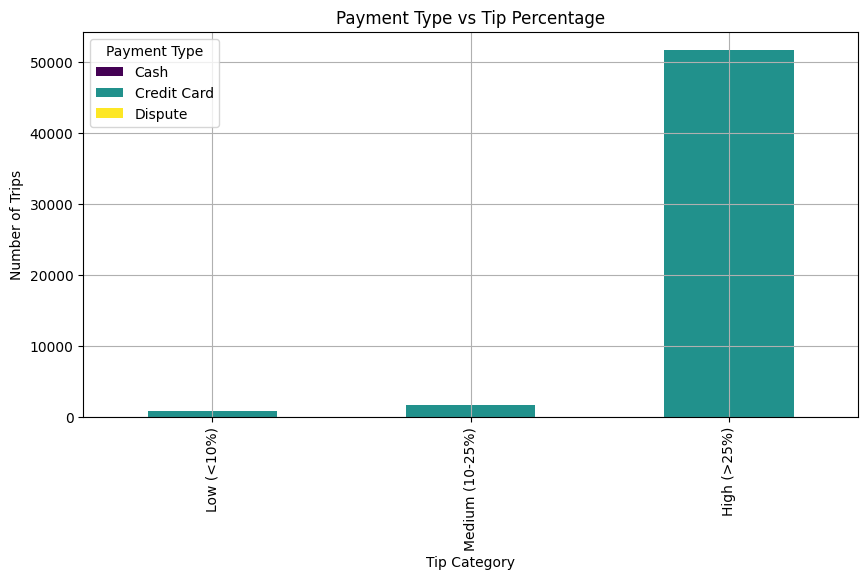

In [114]:
tip_payment = df_clean.groupby(['tip_category', 'payment_type']).size().unstack().fillna(0)

tip_payment.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='viridis')
plt.xlabel('Tip Category')
plt.ylabel('Number of Trips')
plt.title('Payment Type vs Tip Percentage')
plt.legend(title='Payment Type')
plt.grid()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

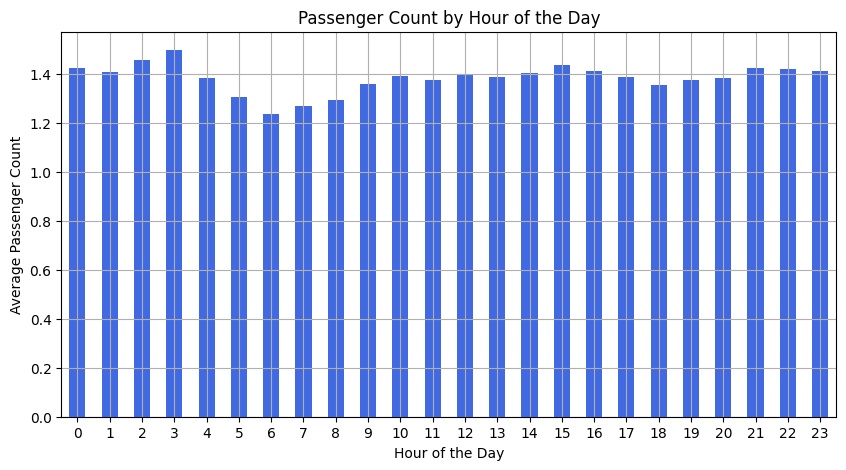

In [115]:
# See how passenger count varies across hours and days

passenger_hourly = df_clean.groupby('pickup_hour')['passenger_count'].mean()

plt.figure(figsize=(10, 5))
passenger_hourly.plot(kind='bar', color='royalblue')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.title("Passenger Count by Hour of the Day")
plt.xticks(rotation=0)
plt.grid()
plt.show()


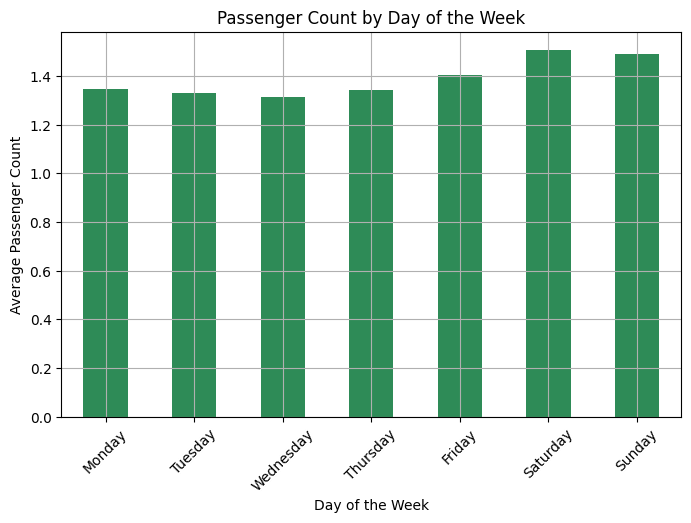

In [116]:
df_clean['pickup_day'] = df_clean['tpep_pickup_datetime'].dt.day_name()

passenger_weekly = df_clean.groupby('pickup_day')['passenger_count'].mean()
passenger_weekly = passenger_weekly.reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)  # Ensure correct order

plt.figure(figsize=(8, 5))
passenger_weekly.plot(kind='bar', color='seagreen')
plt.xlabel("Day of the Week")
plt.ylabel("Average Passenger Count")
plt.title("Passenger Count by Day of the Week")
plt.xticks(rotation=45)
plt.grid()
plt.show()

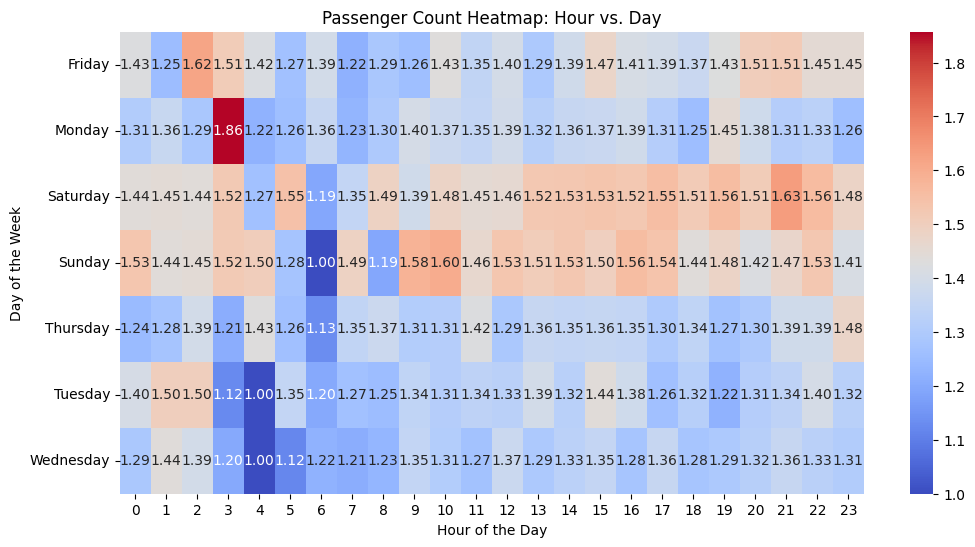

In [117]:
passenger_heatmap = df_clean.groupby(['pickup_day', 'pickup_hour'])['passenger_count'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(passenger_heatmap, cmap="coolwarm", annot=True, fmt=".2f")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Passenger Count Heatmap: Hour vs. Day")
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [118]:
# How does passenger count vary across zones

zone_passenger_count = df_clean.groupby('PULocationID')['passenger_count'].mean().reset_index()
zone_passenger_count = zone_passenger_count.merge(zones, left_on='PULocationID', right_on='LocationID')
top_zones = zone_passenger_count.nlargest(10, 'passenger_count')[['zone', 'passenger_count']]
bottom_zones = zone_passenger_count.nsmallest(10, 'passenger_count')[['zone', 'passenger_count']]
print(top_zones)
print(bottom_zones)

                  zone  passenger_count
75  Murray Hill-Queens         3.000000
36            Elmhurst         2.666667
42        Forest Hills         2.500000
82            Red Hook         2.500000
89            Steinway         2.250000
1              Astoria         2.058824
28       Dyker Heights         2.000000
37    Elmhurst/Maspeth         2.000000
44       Fresh Meadows         2.000000
67             Maspeth         2.000000
                       zone  passenger_count
2              Astoria Park              1.0
8   Briarwood/Jamaica Hills              1.0
10       Brooklyn Navy Yard              1.0
11           Bushwick North              1.0
12           Bushwick South              1.0
19             Clinton Hill              1.0
22          Columbia Street              1.0
23             Coney Island              1.0
24      Crown Heights North              1.0
25            Cypress Hills              1.0


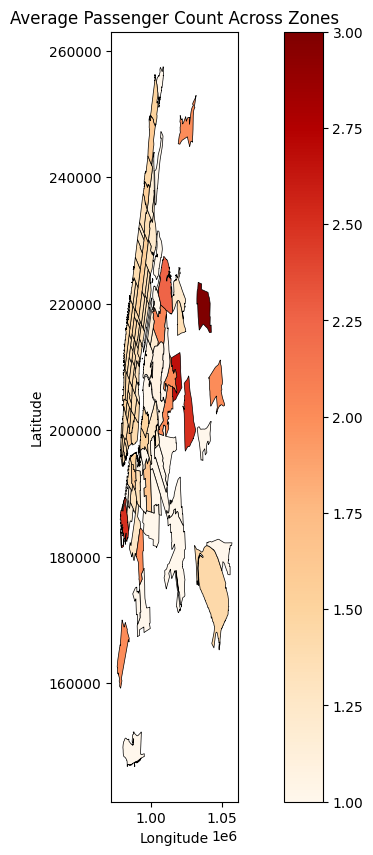

In [121]:
zones = zones.set_geometry('geometry_x', crs="EPSG:4326")
zones = zones.drop(columns=['geometry_y'], errors='ignore')
zones = zones.set_geometry('geometry_x', crs="EPSG:4326")
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones.plot(column='passenger_count', cmap='OrRd', legend=True, edgecolor='black', linewidth=0.5, ax=ax)
plt.title("Average Passenger Count Across Zones")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(False)
plt.show()

In [124]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
print(zones_with_trips.columns)
zones_with_trips = zones_with_trips.merge(
    df_clean[['PULocationID', 'passenger_count']],
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
)

zones_with_trips['avg_passenger_count'] = zones_with_trips.groupby('LocationID')['passenger_count'].transform('mean')
print(zones_with_trips[['LocationID', 'avg_passenger_count']].drop_duplicates().sort_values(by='avg_passenger_count', ascending=False).head(10))

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'pickup_trips', 'dropoff_trips', 'total_trips'],
      dtype='object')
       LocationID  avg_passenger_count
32314         171             3.000000
8237           82             2.666667
9981           95             2.500000
34580         195             2.500000
35387         223             2.250000
95              7             2.058824
8240           83             2.000000
34569         190             2.000000
4304           67             2.000000
10002          98             2.000000


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [125]:
# How often is each surcharge applied?

print(df_clean.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'date', 'hour', 'pickup_hour',
       'pickup_day_of_week', 'pickup_day_of_week_name', 'pickup_month', 'year',
       'quarter', 'trip_duration', 'trip_time', 'trip_count',
       'scaled_trip_count', 'pickup_day', 'is_weekend',
       'fare_per_mile_per_passenger', 'fare_per_mile', 'tip_percentage',
       'distance_bins', 'tip_category'],
      dtype='object')


mta_tax                 54070
congestion_surcharge    52751
airport_fee               906
extra                   34777
dtype: int64
mta_tax                 99.922383
congestion_surcharge    97.484846
airport_fee              1.674305
extra                   64.268554
dtype: float64


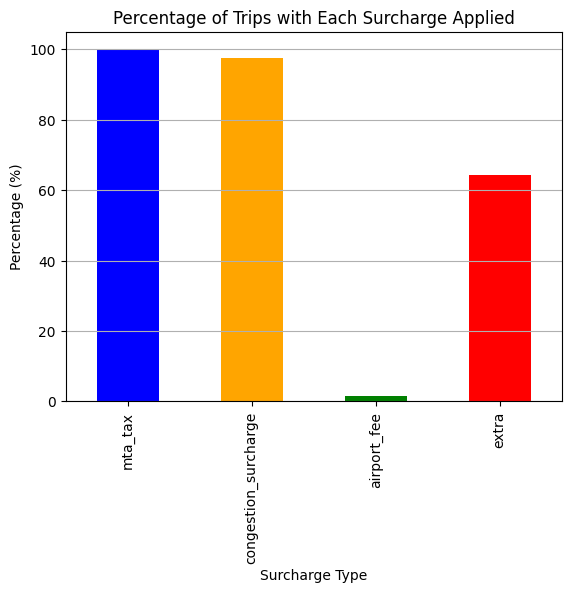

In [126]:
surcharge_counts = df_clean[['mta_tax', 'congestion_surcharge', 'airport_fee', 'extra']].gt(0).sum()
print(surcharge_counts)
surcharge_percentage = (surcharge_counts / len(df_clean)) * 100
print(surcharge_percentage)

surcharge_percentage.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title("Percentage of Trips with Each Surcharge Applied")
plt.ylabel("Percentage (%)")
plt.xlabel("Surcharge Type")
plt.grid(axis='y')
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

I have explored how taxi trip data can help improve routing and dispatching efficiency. After analyzing different trends in demand and operational inefficiencies, I have identified a few strategies that could improve taxi services.
To improve taxi operations, it is essential to analyze demand patterns and identify inefficiencies. By leveraging data, companies can enhance service availability, reduce wait times, and increase efficiency.
* Allocate Taxis Based on Demand
* Implement Dynamic Pricing
Through this analysis, I learned how data can improve transportation services. By using data-driven strategies, taxi companies can reduce waiting times, improve passenger satisfaction, and increase driver earnings.I am still a beginner in data analysis, but this project helped me understand how real-world data can be used to solve problems. I hope to explore more advanced techniques in the future, such as machine learning models for demand forecasting.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Effective cab positioning based on trip trends helps improve availability, reduce wait times, and increase overall efficiency. By analyzing demand patterns across different times, days, and months, taxis can be strategically placed to serve passengers more effectively.

* Peak Hour Allocation
* Weekend & Nighttime Demand
* Airport & Transit Hub Optimization
* Seasonal Adjustments & Event-Based Positioning

By applying these data-driven strategies, cab services can improve operational efficiency, enhance customer satisfaction, and boost profitability while minimizing idle time for drivers.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

To stay competitive while maximizing revenue, cab services should use data-driven pricing. By analyzing trip data, demand trends, and competitor rates, they can adjust fares effectively.
* Surge Pricing
* Off-Peak Discounts
* Zone-Based Pricing
* Competitor Monitoring
* Flexible Fare Options
Using analytics, cab companies can optimize pricing, boost profits, and attract more riders.